In [34]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

In [58]:
# load data 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# check out a review instance 
word_index         = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review     = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review[:100])

? this film was just brilliant casting location scenery story direction everyone's really suited the


In [27]:
# One-hot-encode data 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [33]:
# network architecture 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# # add optimizer, loss fn, metrics 
# model.compile(optimizer = optimizers.RMSprop(lr=0.001),
#               loss = losses.binary_crossentropy,
#               metrics = [metrics.binary_accuracy])

# validation data 
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

# add optimizer, loss fn, metrics 
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# model fit 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.5134 - acc: 0.7861 - val_loss: 0.3921 - val_acc: 0.8610
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.3068 - acc: 0.9040 - val_loss: 0.3198 - val_acc: 0.8780
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2234 - acc: 0.9289 - val_loss: 0.2938 - val_acc: 0.8849
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1747 - acc: 0.9433 - val_loss: 0.2775 - val_acc: 0.8876
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1420 - acc: 0.9539 - val_loss: 0.2851 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1142 - acc: 0.9672 - val_loss: 0.3440 - val_acc: 0.8712
Epoch 7/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0955 - acc: 0.9713 - val_loss: 0.3211 - 

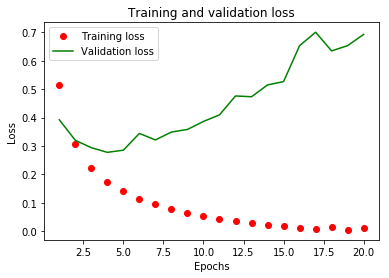

In [51]:
# plot lost (cross-entropy) 
history_dict    = history.history
loss_values     = history_dict['loss'] 
acc             = history_dict['acc']
epochs          = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NOTE: OOS performance deteriorates after ~ 4 epochs 

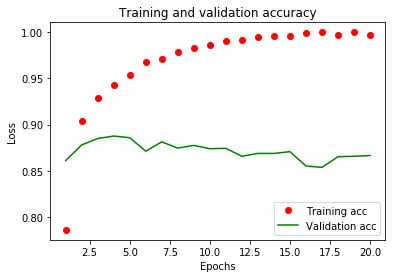

In [53]:
# plot accuracy 
acc_values     = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NOTE: OOS performance deteriorates after ~ 4 epochs 

In [54]:
# retrain from scratch (truncate at 4 epochs)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4595 - accuracy: 0.8275
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2704 - accuracy: 0.9089
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2090 - accuracy: 0.9244
Epoch 4/4
25000/25000 [==============================] - 2s 94us/step


In [59]:
results #(val_loss, val_acc)

[0.28729524625778197, 0.8842800259590149]

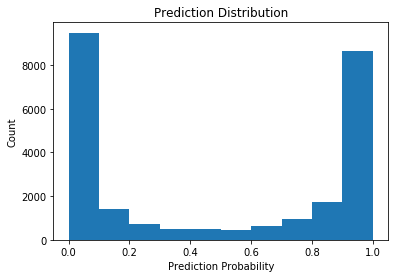

In [63]:
# see pred distro
preds = model.predict(x_train)
plt.hist(preds)
plt.title("Prediction Distribution")
plt.xlabel("Prediction Probability")
plt.ylabel("Count")
plt.show()

# NOTE: this is a good distro since heavy tailed